<a href="https://colab.research.google.com/github/robertosgpontes/ADA-UDESC/blob/main/analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [4]:
from ydata_profiling import ProfileReport

In [5]:
%matplotlib inline

In [6]:
#dados = pd.read_csv('dados.csv')
dados = pd.read_csv('https://raw.githubusercontent.com/robertosgpontes/ADA-UDESC/main/dados.csv')

In [7]:
dados

,sexo,graduation_course,programming_knowledge,altura,idade
0,M,CIÊNCIA DA COMPUTAÇÃO,Programo várias linguagens ou trabalhei com pr...,169,23
1,M,TADS,Já programei um pouco seguindo alguns tutoriais,165,21
2,M,CIÊNCIA DA COMPUTAÇÃO,Já programei um pouco seguindo alguns tutoriais,168,33
3,M,CIÊNCIA DA COMPUTAÇÃO,Já programei um pouco seguindo alguns tutoriais,166,24
4,M,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,Já programei uma linguagem de programação,168,22
...,...,...,...,...,...
75,F,CIÊNCIA DA COMPUTAÇÃO,Já programei um pouco seguindo alguns tutoriais,167,17
76,M,ENGENHARIA DA COMPUTAÇÃO,Programo várias linguagens ou trabalhei com pr...,167,22
77,M,CIÊNCIA DA COMPUTAÇÃO,Já programei uma linguagem de programação,168,22
78,M,TADS,Programo várias linguagens ou trabalhei com pr...,165,20


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sexo                   80 non-null     object
 1   graduation_course      80 non-null     object
 2   programming_knowledge  80 non-null     object
 3   altura                 80 non-null     int64 
 4   idade                  80 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.2+ KB


In [9]:
dados.describe()

,altura,idade
count,80.000000,80.000000
mean,167.550000,24.137500
std,1.875222,4.838516
min,163.000000,16.000000
25%,166.750000,21.000000
50%,167.000000,24.000000
75%,169.000000,26.250000
max,172.000000,36.000000


In [10]:
dados.describe(include='all')

,sexo,graduation_course,programming_knowledge,altura,idade
count,80,80,80,80.000000,80.000000
unique,2,25,5,NaN,NaN
top,M,CIÊNCIA DA COMPUTAÇÃO,Já programei uma linguagem de programação,NaN,NaN
freq,51,24,28,NaN,NaN
mean,NaN,NaN,NaN,167.550000,24.137500
std,NaN,NaN,NaN,1.875222,4.838516
min,NaN,NaN,NaN,163.000000,16.000000
25%,NaN,NaN,NaN,166.750000,21.000000
50%,NaN,NaN,NaN,167.000000,24.000000
75%,NaN,NaN,NaN,169.000000,26.250000


In [11]:
# https://github.com/mstaniak/autoEDA-resources


profile = ProfileReport(dados, title="Profiling Report")

profile.to_widgets()

/usr/local/lib/python3.9/dist-packages/ydata_profiling/profile_report.py:495: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

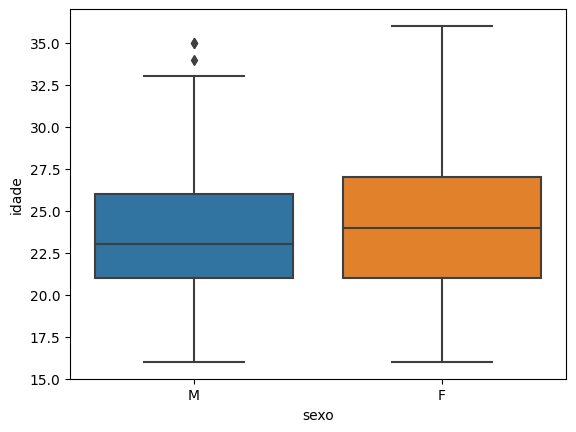

In [12]:
# Criar o boxplot usando o Seaborn
sns.boxplot(x='sexo', y='idade', data=dados)
plt.show()

\begin{align*}
\text{Limite Inferior} &= Q_1 - 1.5 \times IQR \\
\text{Limite Superior} &= Q_3 + 1.5 \times IQR \\
\text{Mediana} &= Q_2 \\
\text{IQR} &= Q_3 - Q_1 \\
\text{Outliers} &= \text{Observações fora do intervalo } [\text{Limite Inferior}, \text{Limite Superior}]
\end{align*}

Onde $Q_1$, $Q_2$, e $Q_3$ são os três quartis do conjunto de dados, $IQR$ é a amplitude interquartil e os outliers são as observações que estão fora do intervalo definido pelos limites inferior e superior.

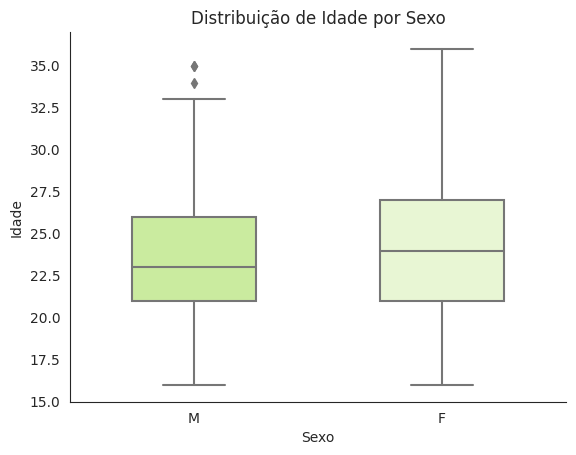

In [13]:
sns.set_style("white")

palette = {"F": "#e9fbcf", "M": "#ccf892"}

sns.boxplot(x="sexo", y="idade", data=dados, palette=palette, whis=1.5,  width=0.5)
sns.despine(right=True, top=True)

plt.xlabel("Sexo")
plt.ylabel("Idade")
plt.title("Distribuição de Idade por Sexo")

plt.show()

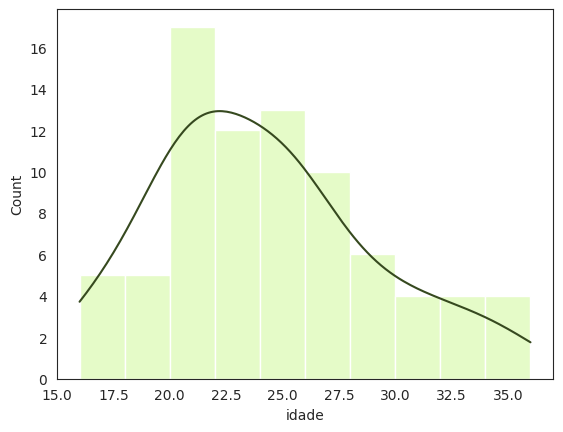

In [14]:
ax = sns.histplot(data=dados, x='idade', bins=10, color='#ccf892', kde=True)
ax.lines[0].set_color('#36491f')

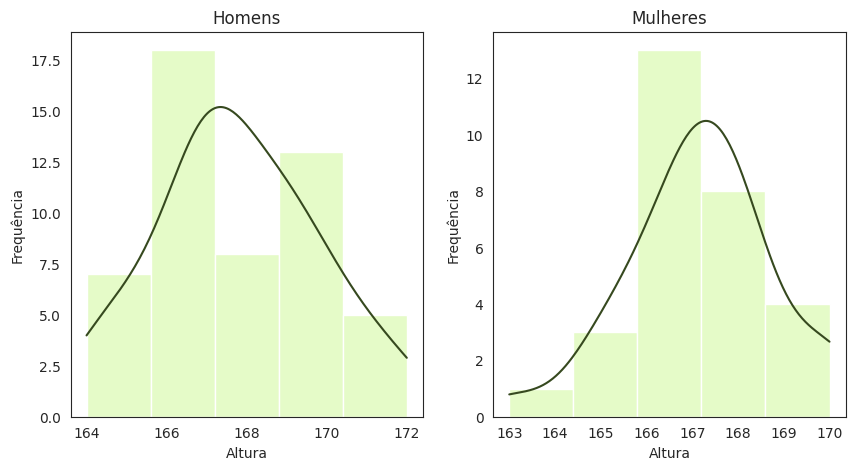

In [15]:
# Crie uma figura com duas subplots lado a lado
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Crie o histograma da altura para homens na primeira subplot
sns.histplot(data=dados[dados['sexo'] == 'M'], x='altura', bins=5, kde=True, color='#ccf892', ax=axs[0])
axs[0].set(title='Homens', xlabel='Altura', ylabel='Frequência')
axs[0].lines[0].set_color('#36491f')

# Crie o histograma da altura para mulheres na segunda subplot
sns.histplot(data=dados[dados['sexo'] == 'F'], x='altura', bins=5, kde=True, color='#ccf892', ax=axs[1])
axs[1].set(title='Mulheres', xlabel='Altura', ylabel='Frequência')
axs[1].lines[0].set_color('#36491f')

# Exiba o histograma
plt.show()


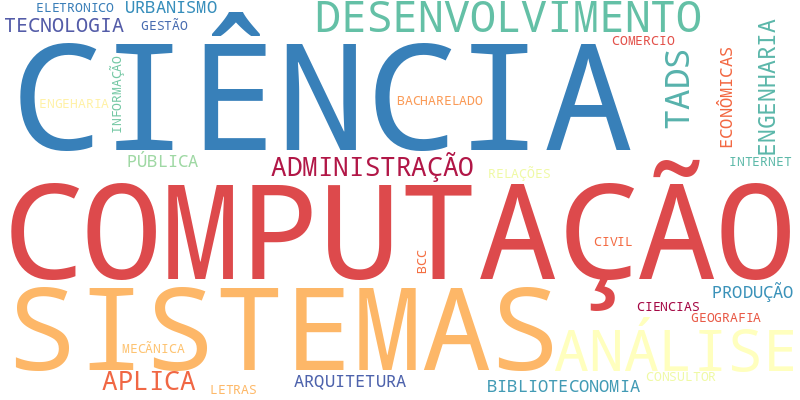

In [16]:
# Concatena todas as linhas da coluna 'curso' em uma única string
text = ' '.join(dados['graduation_course'].str.upper().tolist())

# Define as stopwords (palavras a serem ignoradas)
stopwords = stopwords.words('portuguese')

# Cria a WordCloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white', colormap='Spectral').generate(text)

# Cria o gráfico com o Plotly
fig = px.imshow(wordcloud)
fig.update_layout(title='Wordcloud de Cursos')
fig.show()
